<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_3_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
df = df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
247,57,122000,1
190,24,84000,0
32,21,16000,0
331,48,119000,1
362,47,50000,1


# Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0
                                                    )
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [21]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

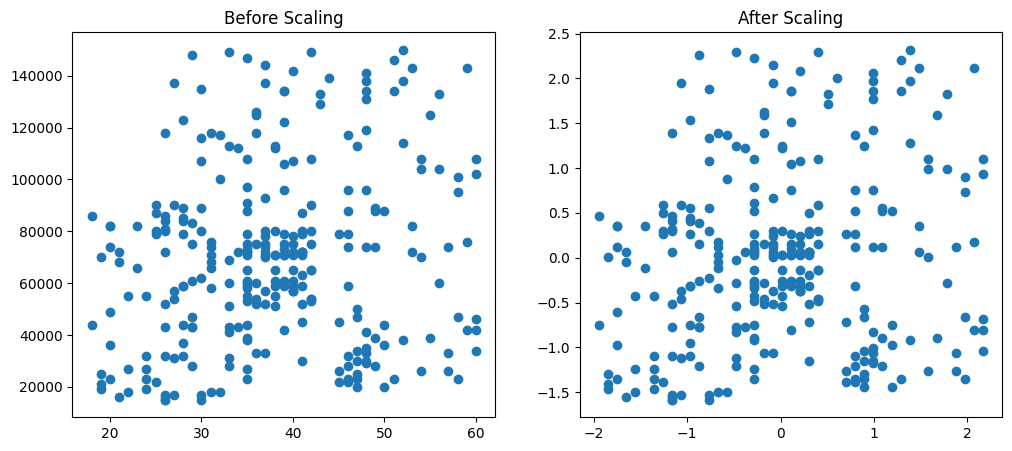

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()

The shape of the data is same but the scale is different. the data is centered after scaling based on standard deviation

<Axes: title={'center': 'After Scalling'}, xlabel='Age', ylabel='Density'>

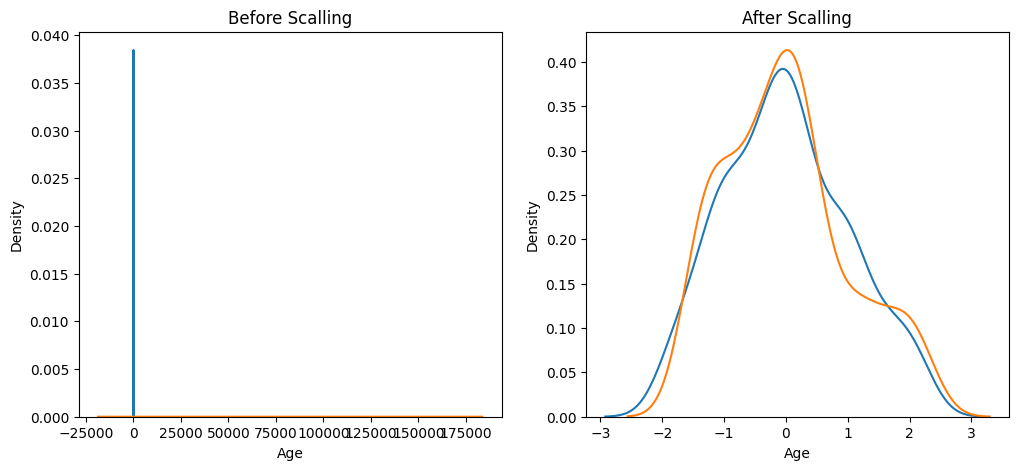

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("Before Scalling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

#after scaling
ax2.set_title("After Scalling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

Before scaling there is no comparision between them
as they are not comaprable but after scaling they are comparable

# Comparison Of Distribution

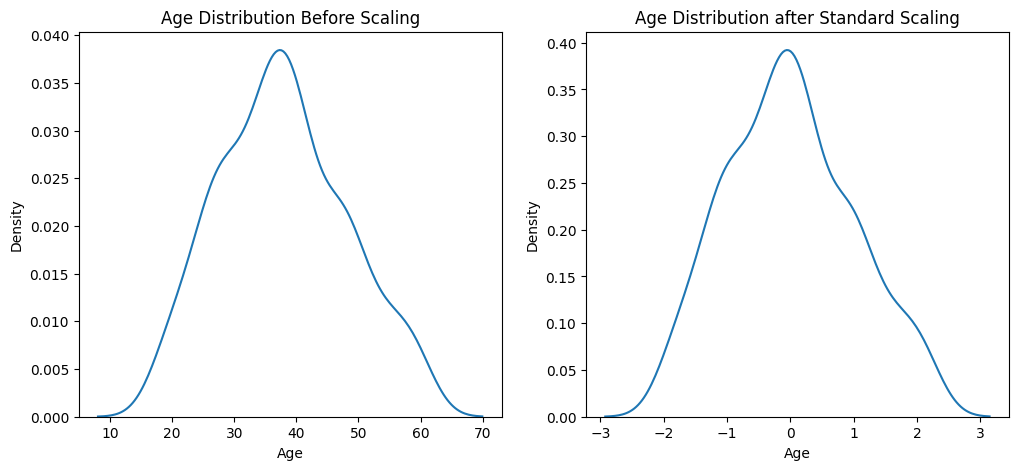

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)

# After Scaling
ax2.set_title("Age Distribution after Standard Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
plt.show()

The Shape of the Distribution after Standard scaling is same. Just the scale is different

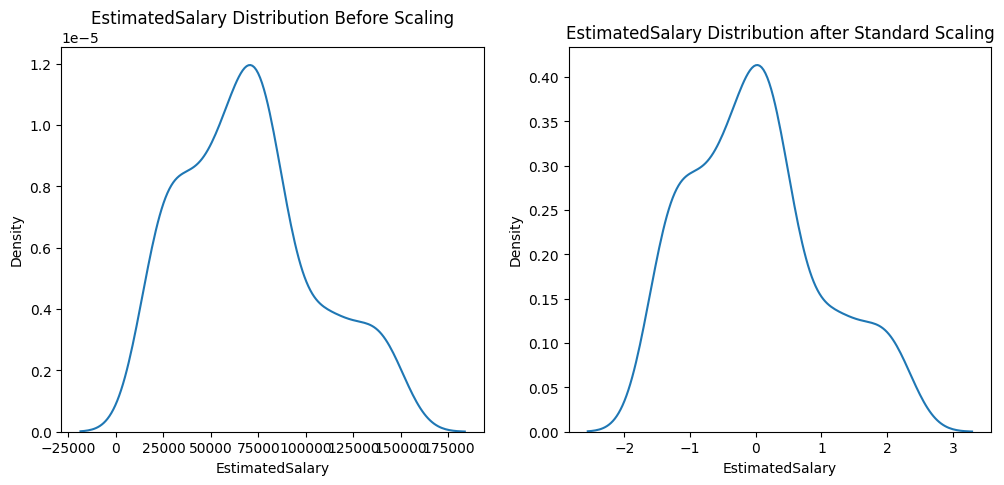

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("EstimatedSalary Distribution Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

# After Scaling
ax2.set_title("EstimatedSalary Distribution after Standard Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

# Why scaling is important

In [26]:
# We will use LogisticRegression algorithm to check the prediction of scaled and not scaled data
# In Conclusion: We will find out that the scaled data trained model has a highrt accuracy score

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [29]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score

In [45]:
print("Scaled", accuracy_score(y_test,y_pred))
print("Actual", accuracy_score(y_test,y_pred_scaled))

Scaled 0.875
Actual 0.8666666666666667


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [48]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [51]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


# Outliers

An outlier is a data point that is significantly different
 from the rest of the data.

It "lies outside" the general pattern or
trend of the dataset — either too high or
 too low compared to other values.

In [53]:
# The Conclusion is: Standardizing the dataset doestnot have any effects
# on the outliers. The outliers will remain outliers even after standardizing